In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/happiness-and-countries/countries of the world.csv
/kaggle/input/happiness-and-countries/world-happiness-report-2021.csv


We consider countries and happiness report datasets and we import these csv files to DataFrame format using the pd.read_csv() function

In [2]:
countries = pd.read_csv("/kaggle/input/happiness-and-countries/countries of the world.csv")
report = pd.read_csv("/kaggle/input/happiness-and-countries/world-happiness-report-2021.csv")

The head() function is used to get the first n rows(the default value of n is 5)

In [3]:
report.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


We add ranks as index

In [4]:
list1 = list(range(1,150))
report['Rank'] = list1
report = report.set_index("Rank")

In [5]:
report.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Rank,,,,,,,,,,,,,,,,,,,,
1,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
2,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
3,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
4,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
5,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


We use distplot to plot the distributions of various columns

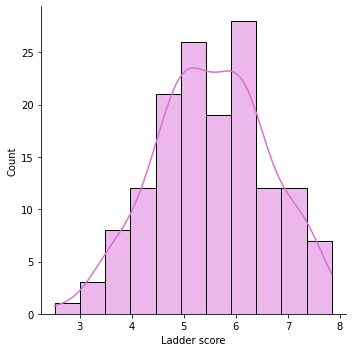

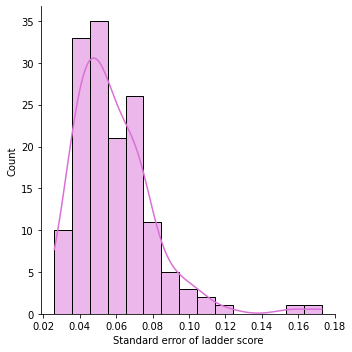

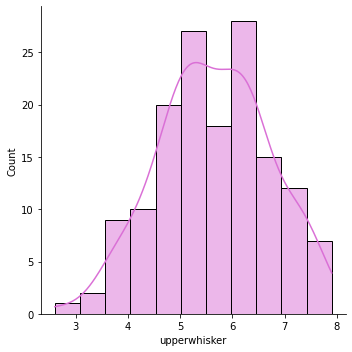

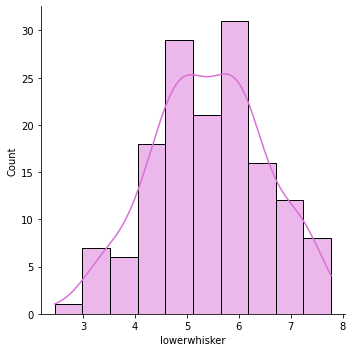

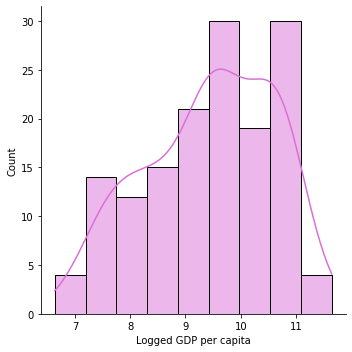

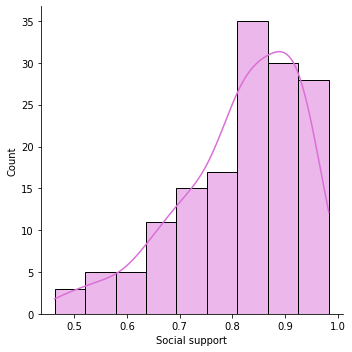

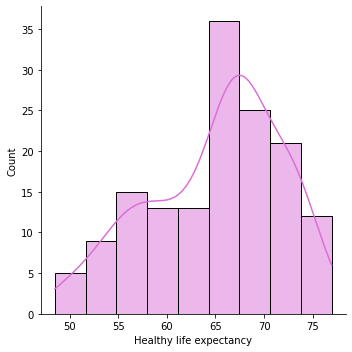

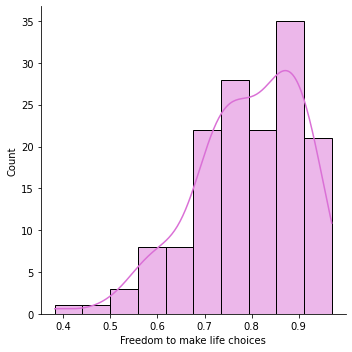

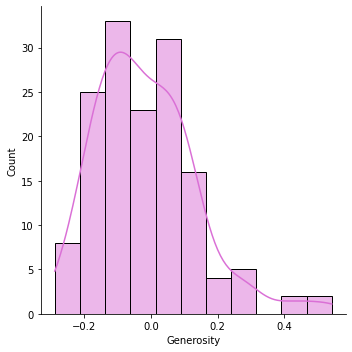

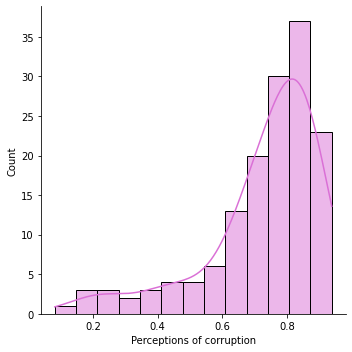

In [6]:
rep_cols = ['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
import seaborn as sns
for col in rep_cols:
    print()
    if report[col].dtype != 'object':
        sns.displot(report[col], kde = True, color = 'orchid');

We split the dataset into top 25 and bottom 25 to analyze better

In [7]:
top_25 = report.head(25)
top_25 = top_25.drop(['Standard error of ladder score', 
        'upperwhisker', 'lowerwhisker',
        'Ladder score in Dystopia', 
        'Explained by: Log GDP per capita', 
        'Explained by: Social support',
        'Explained by: Healthy life expectancy',
        'Explained by: Freedom to make life choices',
        'Explained by: Generosity', 'Explained by: Perceptions of corruption',
        'Dystopia + residual'],1)
#we keep only imp cols

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [8]:
#there were extra spaces in the name of countries so deleting that
countries.replace(r"^ +| +$", r"", regex=True, inplace=True)
#extracting only country name and population to make it easy
country_pop = countries[['Country','Population']]
country_pop = country_pop.rename(columns={"Country": "Country name"})
country_pop

,Country name,Population
0,Afghanistan,31056997
1,Albania,3581655
2,Algeria,32930091
3,American Samoa,57794
4,Andorra,71201
...,...,...
224,Yemen,21456188
225,Zambia,11502010
226,Zimbabwe,12236805
227,Palestinian Territories,4543126


We analyse the data by taking into consideration only the first 25 countries which are considered to be the most happy ones

In [9]:
#we merge both to add population
res = pd.merge(top_25, country_pop, on='Country name')
top_25 = res
list1 = list(range(1,26))
top_25['Rank'] = list1
top_25 = top_25.set_index("Rank")
top_25

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population
Rank,,,,,,,,,,
1,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,5231372
2,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,5450661
3,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,7523934
4,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,299388
5,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,16491461
6,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270,4610820
7,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237,9016596
8,Luxembourg,Western Europe,7.324,11.647,0.908,72.600,0.907,-0.034,0.386,474413
9,New Zealand,North America and ANZ,7.277,10.643,0.948,73.400,0.929,0.134,0.242,4076140


In the below code, we analyse the data by considering the last 25 countries that are considered to be the least happy countries

Ladder Score: Asking survey respondents to place themselves on a “ladder” scale ranging from 0 to 10 based on certain factor, where 0 being the worst and 10 being the best.

In [10]:
bottom_25 = report.tail(25)
bottom_25 = bottom_25.drop(['Standard error of ladder score', 
        'upperwhisker', 'lowerwhisker',
        'Ladder score in Dystopia', 
        'Explained by: Log GDP per capita', 
        'Explained by: Social support',
        'Explained by: Healthy life expectancy',
        'Explained by: Freedom to make life choices',
        'Explained by: Generosity', 'Explained by: Perceptions of corruption',
        'Dystopia + residual'],1)
#we keep only important columns
#we merge both to add population
res = pd.merge(bottom_25, country_pop, on='Country name')
bottom_25 = res
list1 = list(range(125,150))
bottom_25['Rank'] = list1
bottom_25 = bottom_25.set_index("Rank")
bottom_25

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population
Rank,,,,,,,,,,
125,Palestinian Territories,Middle East and North Africa,4.517,8.485,0.826,62.250,0.653,-0.163,0.821,4543126
126,Myanmar,Southeast Asia,4.426,8.541,0.779,59.302,0.876,0.509,0.660,54905066
127,Jordan,Middle East and North Africa,4.395,9.182,0.767,67.000,0.755,-0.167,0.705,5906760
128,Chad,Sub-Saharan Africa,4.355,7.364,0.619,48.478,0.579,0.041,0.807,9944201
129,Sri Lanka,South Asia,4.325,9.470,0.827,67.299,0.841,0.079,0.863,20222240
130,Swaziland,Sub-Saharan Africa,4.308,9.065,0.770,50.833,0.647,-0.185,0.708,1136334
131,Comoros,Sub-Saharan Africa,4.289,8.031,0.626,57.349,0.548,0.082,0.781,690948
132,Egypt,Middle East and North Africa,4.283,9.367,0.750,61.998,0.749,-0.182,0.795,78887007
133,Ethiopia,Sub-Saharan Africa,4.275,7.694,0.764,59.000,0.752,0.082,0.761,74777981


In [11]:
#dark blue = most happy  , light colour = least happy
#we temporarily drop regional indicator to make graph

top_25.drop(['Regional indicator'],1).style.background_gradient(cmap='YlGnBu')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population
Rank,,,,,,,,,
1,Finland,7.842000,10.775000,0.954000,72.000000,0.949000,-0.098000,0.186000,5231372
2,Denmark,7.620000,10.933000,0.954000,72.700000,0.946000,0.030000,0.179000,5450661
3,Switzerland,7.571000,11.117000,0.942000,74.400000,0.919000,0.025000,0.292000,7523934
4,Iceland,7.554000,10.878000,0.983000,73.000000,0.955000,0.160000,0.673000,299388
5,Netherlands,7.464000,10.932000,0.942000,72.400000,0.913000,0.175000,0.338000,16491461
6,Norway,7.392000,11.053000,0.954000,73.300000,0.960000,0.093000,0.270000,4610820
7,Sweden,7.363000,10.867000,0.934000,72.700000,0.945000,0.086000,0.237000,9016596
8,Luxembourg,7.324000,11.647000,0.908000,72.600000,0.907000,-0.034000,0.386000,474413
9,New Zealand,7.277000,10.643000,0.948000,73.400000,0.929000,0.134000,0.242000,4076140


In [12]:
#dark colour = least unhappy  , light colour = most unhappy
bottom_25.drop(['Regional indicator'],1).style.background_gradient(cmap='RdPu')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population
Rank,,,,,,,,,
125,Palestinian Territories,4.517000,8.485000,0.826000,62.250000,0.653000,-0.163000,0.821000,4543126
126,Myanmar,4.426000,8.541000,0.779000,59.302000,0.876000,0.509000,0.660000,54905066
127,Jordan,4.395000,9.182000,0.767000,67.000000,0.755000,-0.167000,0.705000,5906760
128,Chad,4.355000,7.364000,0.619000,48.478000,0.579000,0.041000,0.807000,9944201
129,Sri Lanka,4.325000,9.470000,0.827000,67.299000,0.841000,0.079000,0.863000,20222240
130,Swaziland,4.308000,9.065000,0.770000,50.833000,0.647000,-0.185000,0.708000,1136334
131,Comoros,4.289000,8.031000,0.626000,57.349000,0.548000,0.082000,0.781000,690948
132,Egypt,4.283000,9.367000,0.750000,61.998000,0.749000,-0.182000,0.795000,78887007
133,Ethiopia,4.275000,7.694000,0.764000,59.000000,0.752000,0.082000,0.761000,74777981


We merge both top 25 and bottom 25 to analyze them side by side

In [13]:
#blue = happy countries , red = unhappy countries
frames = [top_25, bottom_25]
rep = pd.concat(frames)
rep.style.background_gradient(cmap='RdYlBu')

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population
Rank,,,,,,,,,,
1,Finland,Western Europe,7.842000,10.775000,0.954000,72.000000,0.949000,-0.098000,0.186000,5231372
2,Denmark,Western Europe,7.620000,10.933000,0.954000,72.700000,0.946000,0.030000,0.179000,5450661
3,Switzerland,Western Europe,7.571000,11.117000,0.942000,74.400000,0.919000,0.025000,0.292000,7523934
4,Iceland,Western Europe,7.554000,10.878000,0.983000,73.000000,0.955000,0.160000,0.673000,299388
5,Netherlands,Western Europe,7.464000,10.932000,0.942000,72.400000,0.913000,0.175000,0.338000,16491461
6,Norway,Western Europe,7.392000,11.053000,0.954000,73.300000,0.960000,0.093000,0.270000,4610820
7,Sweden,Western Europe,7.363000,10.867000,0.934000,72.700000,0.945000,0.086000,0.237000,9016596
8,Luxembourg,Western Europe,7.324000,11.647000,0.908000,72.600000,0.907000,-0.034000,0.386000,474413
9,New Zealand,North America and ANZ,7.277000,10.643000,0.948000,73.400000,0.929000,0.134000,0.242000,4076140


From the above heatmap, we can say that a high GDP, more social support, high life expectancy, more freedom to make life choices and lower corruption leads to a high ladder score. We will further analyze these separately

# Relationship between Geographical Location and Happiness

([<matplotlib.patches.Wedge at 0x7f1f2b40f7d0>,
 [Text(-0.355369625451979, 1.0937149671217452, 'Western Europe'),
  Text(-0.4683570828038905, -0.9953098226117483, 'North America and ANZ'),
  Text(0.4683573390698598, -0.9953097020221398, 'Middle East and North Africa'),
  Text(0.8899187634284573, -0.646563681703485, 'Latin America and Caribbean'),
  Text(1.0227541758021745, -0.40493690357784706, 'Central and Eastern Europe'),
  Text(1.0913261847411593, -0.137866451678084, 'East Asia')],
 [Text(-0.20086109264677068, 0.6181867205470732, '60%'),
  Text(-0.25546749971121296, -0.5428962668791354, '16%'),
  Text(0.2554676394926508, -0.5428962011029852, '12%'),
  Text(0.4854102345973403, -0.3526710991109918, '4%'),
  Text(0.5578659140739134, -0.22087467467882566, '4%'),
  Text(0.5952688280406322, -0.07519988273350037, '4%')])

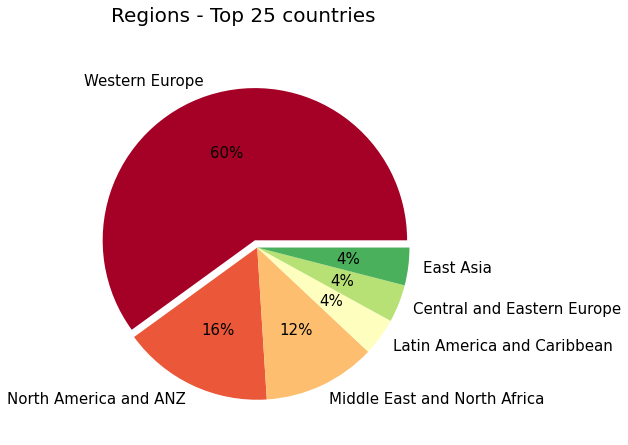

In [14]:
#60% is in western europe which is the most happy countries, rest regions depending on %
top_25_RI = top_25['Regional indicator'].value_counts()

from matplotlib import pyplot as plt
theme = plt.get_cmap('RdYlGn')
textprops = {"fontsize":15}
explode = (0.05, 0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize =(15, 7))
ax.set_prop_cycle("color", [theme(1. * i / 6)
                             for i in range(6)])
fig.suptitle('Regions - Top 25 countries', fontsize=20)
plt.pie(top_25_RI, explode = explode, autopct='%1.0f%%', labels = top_25_RI.index, textprops = textprops)

([<matplotlib.patches.Wedge at 0x7f1f2b3c3810>,
 [Text(-0.4896461385365886, 1.040551132341034, 'Sub-Saharan Africa'),
  Text(-0.20611955530271972, -1.0805159549593932, 'Middle East and North Africa'),
  Text(0.7011662863559625, -0.8475646517391985, 'South Asia'),
  Text(1.0227540810198237, -0.4049371429707282, 'Southeast Asia'),
  Text(1.0913261524711573, -0.13786670712140953, 'Latin America and Caribbean')],
 [Text(-0.2767565130858979, 0.5881375965405844, '64%'),
  Text(-0.11242884834693802, -0.5893723390687599, '16%'),
  Text(0.38245433801234313, -0.4623079918577445, '12%'),
  Text(0.5578658623744492, -0.22087480525676081, '4%'),
  Text(0.595268810438813, -0.07520002206622338, '4%')])

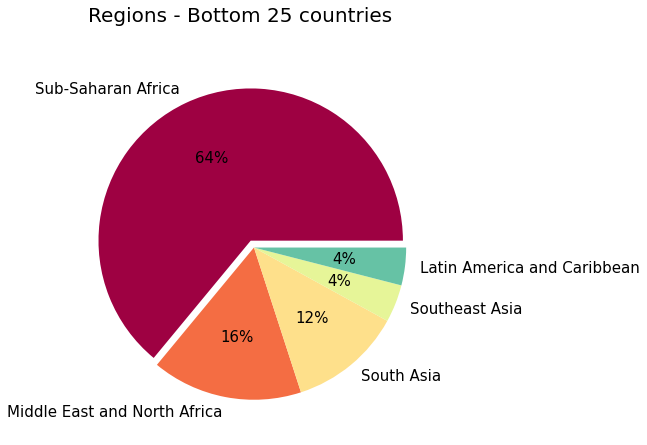

In [15]:
bottom_25_RI = bottom_25['Regional indicator'].value_counts()
theme = plt.get_cmap('Spectral')
textprops = {"fontsize":15}
explode = (0.05, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize =(15, 7))
ax.set_prop_cycle("color", [theme(1. * i / 5)
                             for i in range(5)])
fig.suptitle('Regions - Bottom 25 countries', fontsize=20)
plt.pie(bottom_25_RI, explode = explode, autopct='%1.0f%%', labels = bottom_25_RI.index, textprops = textprops)

From our analysis, we can say that the countries that lie in western Europe tend to be the happiest countries whereas the countries lying in the African region tend to be the least happy.

# Relationship between Happiness(i.e., Ladder score), GDP and freedom to make choices.

In [16]:
import plotly.express as px
fig = px.scatter_3d(report, x='Ladder score', y='Logged GDP per capita', z='Freedom to make life choices', color='Ladder score')
fig.show()


From the above graph we can see that there is a linear relation between the three parameters : Ladder score, Freedom to make life choices and GDP.

Ladder score increases with an increase in GDP and Freedom.

# Relationship between Happiness(i.e., Ladder score), Social support and Corruption.

In [17]:
fig1 = px.scatter_3d(report, x='Ladder score', y='Social support', z= 'Perceptions of corruption', color='Ladder score')
fig1.show()

As there is no linear or logarithmic relationship, let's just consider the top 25 and bottom 25 countries.

In [18]:
fig1 = px.scatter_3d(rep, x='Ladder score', y='Social support', z= 'Perceptions of corruption', color='Ladder score')
fig1.show()

From the above graph, we can see that:

In the most happy countries - 
* Perception of corruption varies from 0.179 to 0.868
* Social support is high

In the least happy countries - 
* Perception of corruption is high
* Social support varies from 0.463 to 0.832

From the above points we can conclude that only perception of corruption or social support cannot explain the ladder score but a combination of both is required

# Conclusion

By analysing the data that is available, we could tell that a country is happy when it tends to be
* Wealthier
* Have high social support
* Have lower perception of corruption
* Has more freedom to make life choices
* Less populous